# Proyek Analisis Data: [Bike-sharing-datase]
- **Nama:** [Fadel]
- **Email:** [Fadelamili74@gmail.com]
- **ID Dicoding:** [Fadel Amili]

## Menentukan Pertanyaan Bisnis

- berapa total sepeda yang disewa pada saat musim yang berbeda dengan tahun yang berbeda?

- bagaimana trend penyewaaan sepeda ketika hari biasa, tanggal merah dan hari kerja?

- bagaimana trend penyewaaan lebih diminati sepanjang tahun 2011 sampai dengan 2012?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Pengambilan data days

In [2]:
days_df = pd.read_csv("https://github.com/fadel11-hub/Dicoding-belajar-analisis-data/raw/main/proyek%20analisis%20data/Bike-sharing-dataset/day.csv")
days_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


#### Pengambilan data hours

In [3]:
hours_df = pd.read_csv("https://github.com/fadel11-hub/Dicoding-belajar-analisis-data/raw/main/proyek%20analisis%20data/Bike-sharing-dataset/hour.csv")
hours_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


### Assessing Data

#### Menilai data days

In [4]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Hasil diatas harus ada perubahan tipe data int ke date

In [5]:
# cek missing value
print('jumlah missing value : ', days_df.isna().sum())

jumlah missing value :  instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [6]:
print('jumlah duplikasi data : ',days_df.duplicated().sum())

jumlah duplikasi data :  0


In [7]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai data hours

In [8]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
# cek missing value
hours_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [10]:
print('Jumlah duplikasi data : ',hours_df.duplicated().sum())

Jumlah duplikasi data :  0


### Cleaning Data

### Menggabungkan data days dengan data hour

In [11]:
days_df['hours'] = hours_df['hr']
days_data = days_df

days_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hours
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,3
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,4


###Mengubah tipe data

In [12]:
days_data['dteday'] = pd.to_datetime(days_data['dteday'])
# Mengubah tipe data menjadi kategori
days_data['season'] = days_data.season.astype('category')
days_data['yr'] = days_data.yr.astype('category')
days_data['mnth'] = days_data.mnth.astype('category')
days_data['holiday'] = days_data.holiday.astype('category')
days_data['weekday'] = days_data.weekday.astype('category')
days_data['workingday'] = days_data.workingday.astype('category')
days_data['weathersit'] = days_data.weathersit.astype('category')
days_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
 16  hours       731 non-null  

### Memperjelas nama data

In [13]:
days_data.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hours
count,731.000000,731,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4.0,2.0,12.0,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188.0,366.0,62.0,710.0,105.0,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,11.805746
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,0.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,6.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,12.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,18.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,23.000000


In [14]:
# mengubah nama kolom menjadi lebih jelas
days_data.rename(columns={
    'yr' : 'year',
    'mnth' : 'month',
    'hum' : 'humidity',
    'cnt' : 'total_count',
},inplace=True)

days_data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_count,hours
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,3
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,4


In [15]:
#Ubah season menjadi kata kata
# season (1:springer, 2:summer, 3:fall, 4:winter)


days_data['season'] = days_data['season'].map({
    1 :'springer',
    2 : 'summer',
    3 : 'fall',
    4 : 'winter'
})
days_data['year'] = days_data['year'].map({
    0 : '2011',
    1 : '2012'
})
days_data['month'] = days_data['month'].map({
    1 : 'jan',
    2 : 'feb',
    3 : 'mar',
    4 : 'apr',
    5 : 'mei',
    6 : 'juni',
    7 : 'juli',
    8 : 'agus',
    9 : 'sept',
    10 : 'okt',
    11 : 'novem',
    12 : 'desem'
})

days_data['weekday'] = days_data['weekday'].map({
    0 : 'Senin',
    1 : 'Selasa',
    2 : 'Rabu',
    3 : 'Kamis',
    4 : 'Jumat',
    5 : 'Sabtu',
    6 : 'Minggu'
})

days_data['workingday'] = days_data['workingday'].map({
    0 : 'no',
    1 : 'yes'
})
days_data['holiday'] = days_data['holiday'].map({
    0 : 'no',
    1 : 'yes'
})

days_data['weathersit'] =days_data['weathersit'].map({
    1 : 'Clear/Partly cloudy',
    2 : 'Misty/Cloudy',
    3 : 'Light/Rain',
    4: 'Severe weather'
})

In [16]:
days_data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_count,hours
0,1,2011-01-01,springer,2011,jan,no,Minggu,no,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,2,2011-01-02,springer,2011,jan,no,Senin,no,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801,1
2,3,2011-01-03,springer,2011,jan,no,Selasa,yes,Clear/Partly cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2
3,4,2011-01-04,springer,2011,jan,no,Rabu,yes,Clear/Partly cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562,3
4,5,2011-01-05,springer,2011,jan,no,Kamis,yes,Clear/Partly cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600,4


In [17]:
# Statistik deskriptif suhu berdasarkan musim
season_temp_stats = days_data.groupby('season')['temp'].describe()
season_temp_stats

<ipython-input-17-8e643caf96d4>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_temp_stats = days_data.groupby('season')['temp'].describe()


,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
springer,181.0,0.297748,0.102735,0.059130,0.222500,0.285833,0.361739,0.572500
summer,184.0,0.544405,0.122650,0.253043,0.458125,0.562083,0.631667,0.808333
fall,188.0,0.706309,0.070848,0.469167,0.667083,0.714583,0.750208,0.861667
winter,178.0,0.422906,0.107834,0.220833,0.331250,0.409166,0.513542,0.657500


### Membuat nilai normalisasi menjadi nilai asli pada temp, atemp, hum dan windspeed

Penjelasan Kategori
* Rendah (Low): 0 hingga sekitar 22.33
* Sedang (Medium): sekitar 22.33 hingga sekitar 44.67
* Tinggi (High): sekitar 44.67 hingga 67

In [18]:
# Mengembalikan nilai asli dari windspeed
days_data['windspeed'] = days_data['windspeed'] * 67

# Mendefinisikan batas kategori
low_max = 67 / 3
medium_max = 2 * 67 / 3

# Fungsi untuk mengkategorikan kecepatan angin
def categorize_windspeed(windspeed):
    if windspeed <= low_max:
        return 'Low'
    elif windspeed <= medium_max:
        return 'Medium'
    else:
        return 'High'

# Menerapkan fungsi pada kolom windspeed_original
days_data['windspeed_category'] = days_data['windspeed'].apply(categorize_windspeed)

days_data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_count,hours,windspeed_category
0,1,2011-01-01,springer,2011,jan,no,Minggu,no,Misty/Cloudy,0.344167,0.363625,0.805833,10.749882,331,654,985,0,Low
1,2,2011-01-02,springer,2011,jan,no,Senin,no,Misty/Cloudy,0.363478,0.353739,0.696087,16.652113,131,670,801,1,Low
2,3,2011-01-03,springer,2011,jan,no,Selasa,yes,Clear/Partly cloudy,0.196364,0.189405,0.437273,16.636703,120,1229,1349,2,Low
3,4,2011-01-04,springer,2011,jan,no,Rabu,yes,Clear/Partly cloudy,0.200000,0.212122,0.590435,10.739832,108,1454,1562,3,Low
4,5,2011-01-05,springer,2011,jan,no,Kamis,yes,Clear/Partly cloudy,0.226957,0.229270,0.436957,12.522300,82,1518,1600,4,Low


## Exploratory Data Analysis (EDA)

In [19]:
# berapa total sepeda yang disewa pada saat musim yang berbeda dengan tahun yang berbeda
days_data.groupby(by=['year','season' ]).agg({
    'total_count' : 'sum'
})

<ipython-input-19-afe30f751188>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_data.groupby(by=['year','season' ]).agg({


total_count
year season               
2011 springer       150000
     summer         347316
     fall           419650
     winter         326137
2012 springer       321348
     summer         571273
     fall           641479
     winter         515476

In [20]:
# bagaimana trend penyewaaan sepeda ketika hari biasa, tanggal merah dan hari kerja
days_data.groupby(by=['weekday', 'workingday', 'holiday']).agg({
    'total_count' : 'sum',
}).reset_index()

<ipython-input-20-616110b61a30>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_data.groupby(by=['weekday', 'workingday', 'holiday']).agg({


,weekday,workingday,holiday,total_count
0,Senin,no,no,444027
1,Senin,no,yes,0
2,Senin,yes,no,0
3,Senin,yes,yes,0
4,Selasa,no,no,0
5,Selasa,no,yes,59605
6,Selasa,yes,no,395898
7,Selasa,yes,yes,0
8,Rabu,no,no,0
9,Rabu,no,yes,1013


In [21]:
#  bagaiamana kecepatan angin dalam waktu('hour') disepanjang tahun 2011 daan 2012 mempengaruhi total penyewa
hourly_data = days_data.groupby('hours')[['windspeed', 'total_count']].mean()

days_data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_count,hours,windspeed_category
0,1,2011-01-01,springer,2011,jan,no,Minggu,no,Misty/Cloudy,0.344167,0.363625,0.805833,10.749882,331,654,985,0,Low
1,2,2011-01-02,springer,2011,jan,no,Senin,no,Misty/Cloudy,0.363478,0.353739,0.696087,16.652113,131,670,801,1,Low
2,3,2011-01-03,springer,2011,jan,no,Selasa,yes,Clear/Partly cloudy,0.196364,0.189405,0.437273,16.636703,120,1229,1349,2,Low
3,4,2011-01-04,springer,2011,jan,no,Rabu,yes,Clear/Partly cloudy,0.200000,0.212122,0.590435,10.739832,108,1454,1562,3,Low
4,5,2011-01-05,springer,2011,jan,no,Kamis,yes,Clear/Partly cloudy,0.226957,0.229270,0.436957,12.522300,82,1518,1600,4,Low


In [22]:
# Total penjualan perbulan
days_data.groupby(by='month').agg({
    'total_count' : ['sum', 'min', 'max', 'mean']
})

<ipython-input-22-bca7186fe2c3>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_data.groupby(by='month').agg({


total_count                         
              sum   min   max         mean
month                                     
jan        134933   431  4521  2176.338710
feb        151352  1005  5062  2655.298246
mar        228920   605  8362  3692.258065
apr        269094   795  7460  4484.900000
mei        331686  2633  8294  5349.774194
juni       346342  3767  8120  5772.366667
juli       344948  3285  8173  5563.677419
agus       351194  1115  7865  5664.419355
sept       345991  1842  8714  5766.516667
okt        322352    22  8156  5199.225806
novem      254831  1495  6852  4247.183333
desem      211036   441  6606  3403.806452

In [23]:
days_data.groupby(by='workingday').agg({
    'total_count' : ['sum', 'min', 'max', 'mean']
})

<ipython-input-23-ae22528c7623>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_data.groupby(by='workingday').agg({


total_count                        
                   sum  min   max         mean
workingday                                    
no             1000269  605  8714  4330.168831
yes            2292410   22  8362  4584.820000

## Visualization & Explanatory Analysis

### Pertanyaan 1: berapa total sepeda yang disewa pada saat musim yang berbeda dengan tahun yang berbeda?


In [24]:
# berapa total sepeda yang disewa pada saat musim yang berbeda dengan tahun yang berbeda
days_data.groupby(by=['year','season' ]).agg({
    'total_count' : 'sum'
})

<ipython-input-24-afe30f751188>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_data.groupby(by=['year','season' ]).agg({


total_count
year season               
2011 springer       150000
     summer         347316
     fall           419650
     winter         326137
2012 springer       321348
     summer         571273
     fall           641479
     winter         515476

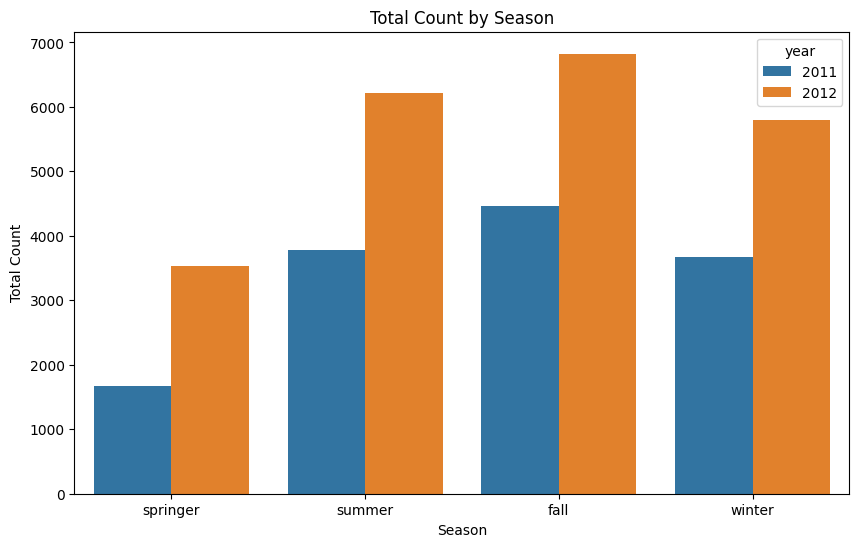

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x= days_data['season'], y= days_data['total_count'],  hue=days_data['year'], errorbar=None)
plt.xlabel('Season')
plt.ylabel('Total Count')
plt.title('Total Count by Season')
plt.show()

Disini kita dapat kesimpulan bahwa musim yang biasanya banyak menggunakan sepeda pada season fall/ musim gugur dan musim yang yang sedikit menggunakan sepeda ialah pada season springer / musim semi

### Pertanyaan 2: bagaimana trend penyewaaan sepeda ketika hari biasa, tanggal merah dan hari kerja?


In [26]:
# bagaimana trend penyewaaan sepeda ketika hari biasa, tanggal merah dan hari kerja
days_data.groupby(by=['weekday', 'workingday', 'holiday']).agg({
    'total_count' : 'sum',
}).reset_index()

<ipython-input-26-616110b61a30>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_data.groupby(by=['weekday', 'workingday', 'holiday']).agg({


,weekday,workingday,holiday,total_count
0,Senin,no,no,444027
1,Senin,no,yes,0
2,Senin,yes,no,0
3,Senin,yes,yes,0
4,Selasa,no,no,0
5,Selasa,no,yes,59605
6,Selasa,yes,no,395898
7,Selasa,yes,yes,0
8,Rabu,no,no,0
9,Rabu,no,yes,1013


<ipython-input-27-de88348eccc4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= days_data['workingday'], y= days_data['total_count'],
<ipython-input-27-de88348eccc4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= days_data['holiday'], y= days_data['total_count'],
<ipython-input-27-de88348eccc4>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= days_data['weekday'], y= days_data['total_count'],
<ipython-input-27-de88348eccc4>:16: UserWarning: 
The palette list has fewer values (2) than needed (7) and will cycle, which may produce 

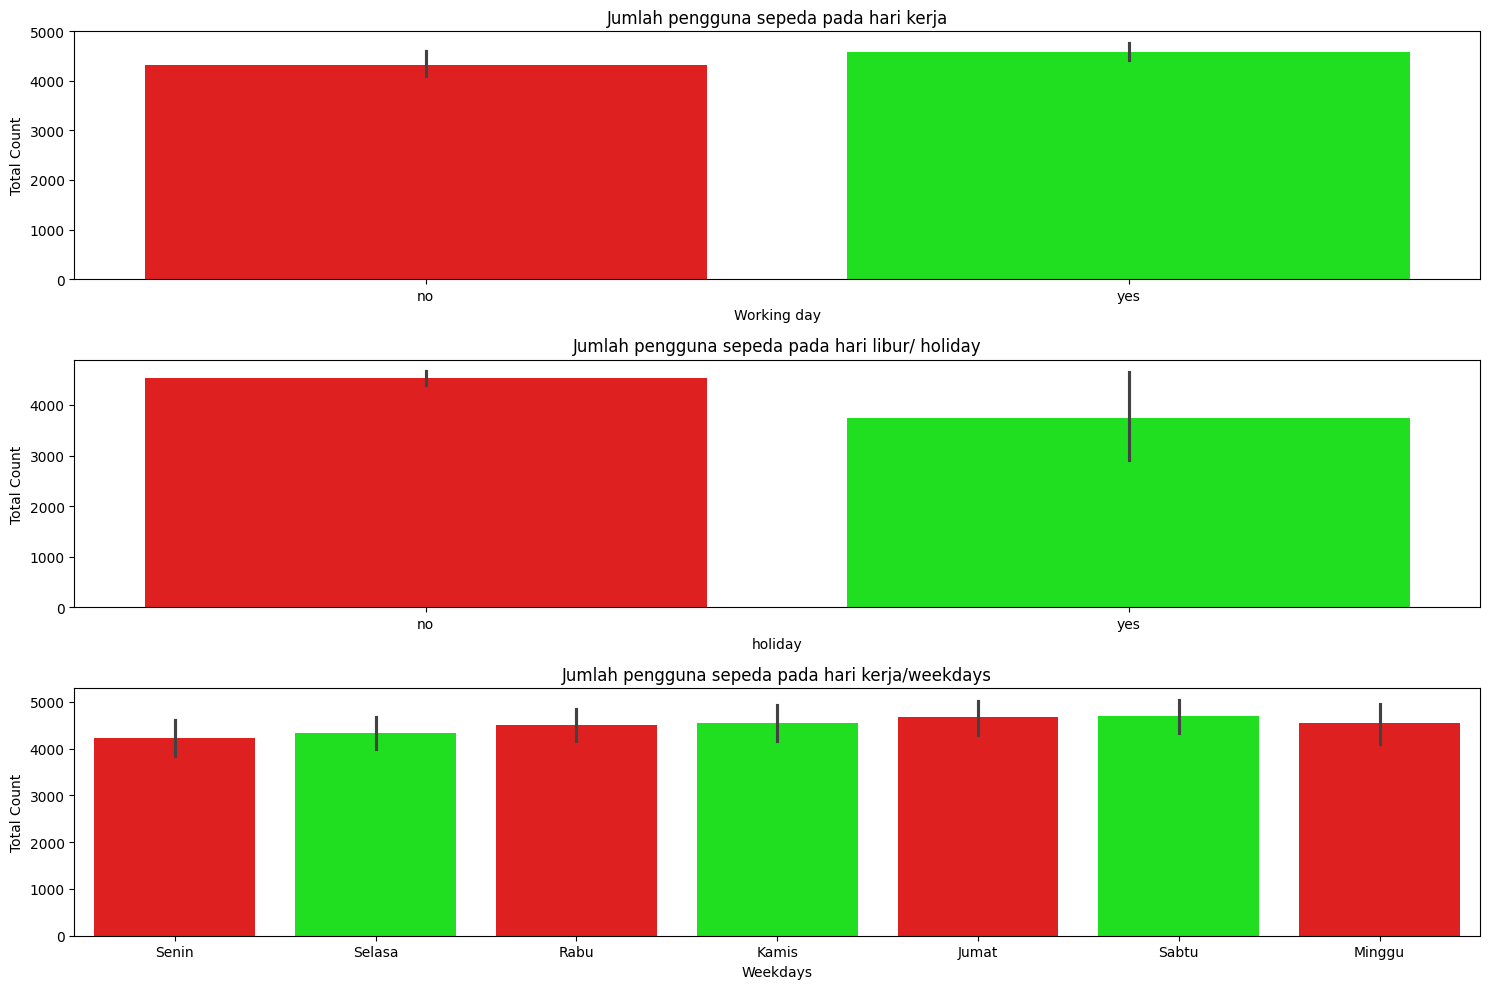

In [27]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
sns.barplot(x= days_data['workingday'], y= days_data['total_count'],
            palette = ['#FF0000', '#00FF00'],
            ax= axes[0])
axes[0].set_xlabel('Working day')
axes[0].set_ylabel('Total Count')
axes[0].set_title('Jumlah pengguna sepeda pada hari kerja')

sns.barplot(x= days_data['holiday'], y= days_data['total_count'],
            palette = ['#FF0000', '#00FF00'],
            ax= axes[1])
axes[1].set_xlabel('holiday')
axes[1].set_ylabel('Total Count')
axes[1].set_title('Jumlah pengguna sepeda pada hari libur/ holiday')

sns.barplot(x= days_data['weekday'], y= days_data['total_count'],
            palette = ['#FF0000', '#00FF00'],
            ax= axes[2])
axes[2].set_xlabel('Weekdays')
axes[2].set_ylabel('Total Count')
axes[2].set_title('Jumlah pengguna sepeda pada hari kerja/weekdays')\

plt.tight_layout()

plt.show()



Beberapa kesimpulan yang ada yaitu :
* Jumlah pengguna penyewaan sepeda biasanya paling banyak pada hari kerja (senin - jumat ) dibanding pada hari libur(sabtu - minggu)

* Jumlah pengguna penyewaan sepeda biasanya paling banyak bukan pada hari libur atau tanggal merah akan tetapi pada hari bukan tanggal merah

* Jumlah penggunaan penyewaan sepeda paling banyak pada hari jumat dibanding hari biasanya dan paling seikit pada hari senin

### Pertanyaan 3: bagaimana trend penyewaaan lebih diminati sepanjang tahun 2011 sampai dengan 2012?


In [28]:
days_data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_count,hours,windspeed_category
0,1,2011-01-01,springer,2011,jan,no,Minggu,no,Misty/Cloudy,0.344167,0.363625,0.805833,10.749882,331,654,985,0,Low
1,2,2011-01-02,springer,2011,jan,no,Senin,no,Misty/Cloudy,0.363478,0.353739,0.696087,16.652113,131,670,801,1,Low
2,3,2011-01-03,springer,2011,jan,no,Selasa,yes,Clear/Partly cloudy,0.196364,0.189405,0.437273,16.636703,120,1229,1349,2,Low
3,4,2011-01-04,springer,2011,jan,no,Rabu,yes,Clear/Partly cloudy,0.200000,0.212122,0.590435,10.739832,108,1454,1562,3,Low
4,5,2011-01-05,springer,2011,jan,no,Kamis,yes,Clear/Partly cloudy,0.226957,0.229270,0.436957,12.522300,82,1518,1600,4,Low


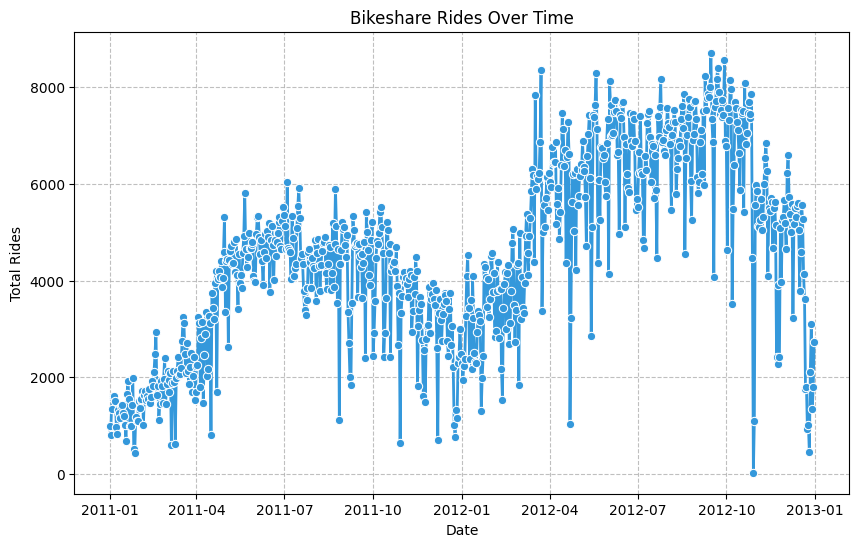

In [29]:
plt.figure(figsize=(10, 6))
sns.lineplot(x= days_data['dteday'], y= days_data['total_count'], color='#3498db', linestyle='-', linewidth=2, marker='o', markersize=6)

plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Bikeshare Rides Over Time")

plt.grid(True, linestyle='--', alpha=0.8)

plt.show()

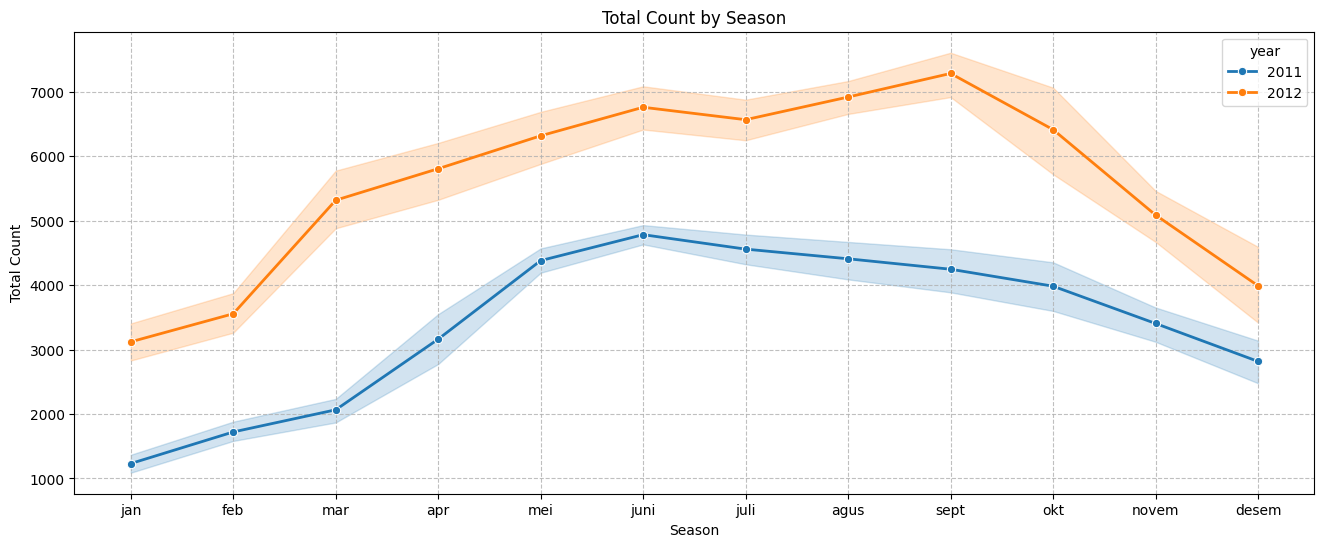

In [30]:

plt.figure(figsize=(16, 6))
sns.lineplot(x= days_data['month'], y= days_data['total_count'], hue=days_data['year'],color='#3498db', linestyle='-', linewidth=2, marker='o', markersize=6)
plt.xlabel('Season')
plt.ylabel('Total Count')
plt.title('Total Count by Season')

plt.grid(True, linestyle='--', alpha=0.8)

plt.show()

## Conclusion

- Berapa total sepeda yang disewa pada saat musim yang berbeda dengan tahun yang berbeda ?
- Bagaimana trend penyewaan sepeda ketika hari biasa, hari libur dan hari kerja?

- Bagaimana trend penyewaan lebih diminati sepanjang tahun 2011 sampai dengan 2012?


Berdasarkan hasil analisis menggunakan visualisasi, dapat diambil kesimpulan bahwa musim yang paling diminati oleh pengguna sepeda adalah musim gugur (Fall). Selanjutnya, musim panas (Summer) menjadi pilihan selanjutnya yang disukai, diikuti oleh musim dingin (Winter), dan musim semi (Spring) menempati peringkat terakhir dalam tingkat kepopulerannya.

Jumlah pengguna sepeda berdasarkan hari yang paling banyak pada hari Jumat yang menjadi pilihan pada hari kerja sementara pada hari yang paling sedikit itu pada hari senin dan pada analisis sebelumnya penggunaan sepeda itu banyak yang menggunakan ketika hari kerja dibanding hari libur.

tren penggunaan sepeda dari tahun 2011 sampai dengan 2012 paling tinggi pada April 2012 sampai dengan oktober 2012 yang naik secara progresif/mengalami peningkatan tertinggi




### Menyimpan hasil dari data analysis

In [31]:
days_data.to_csv("days_data.csv", index=False)